In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
    table.dataframe td,table.dataframe th{
        border:1px solid black;
        background-color:white;
    }
</style>

In [3]:
df = pd.read_csv('covid19_italy_region.csv')

In [4]:
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [5]:
df.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        6027 non-null   int64  
 1   Date                       6027 non-null   object 
 2   Country                    6027 non-null   object 
 3   RegionCode                 6027 non-null   int64  
 4   RegionName                 6027 non-null   object 
 5   Latitude                   6027 non-null   float64
 6   Longitude                  6027 non-null   float64
 7   HospitalizedPatients       6027 non-null   int64  
 8   IntensiveCarePatients      6027 non-null   int64  
 9   TotalHospitalizedPatients  6027 non-null   int64  
 10  HomeConfinement            6027 non-null   int64  
 11  CurrentPositiveCases       6027 non-null   int64  
 12  NewPositiveCases           6027 non-null   int64  
 13  Recovered                  6027 non-null   int64

In [7]:
df.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


In [8]:
df.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

<h4>Relating the variables with scatterplots</h4>

In [9]:
xvalue = df['RegionName'].unique()

In [10]:
yvalue = df.groupby('RegionName')['HospitalizedPatients'].sum()

In [11]:
def fun():
    li=[]
    for element in yvalue:
        li.append(element)
    return li

In [12]:
n = fun()

In [13]:
n

[51685,
 9364,
 23890,
 145592,
 298742,
 30509,
 267260,
 117844,
 1019671,
 70829,
 3751,
 29089,
 29466,
 411093,
 100095,
 33562,
 100775,
 123617,
 24294,
 11879,
 165300]

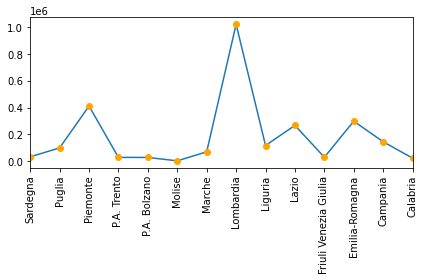

In [14]:
plt.plot(xvalue,n,marker='o',markerfacecolor='orange',markeredgecolor='orange')
plt.xlim(['Sardegna','Calabria'])
plt.xticks(rotation=90);
plt.tight_layout()

In [15]:
y_temp = df.groupby('RegionName')['Recovered'].sum()
def fun():
    li=[]
    for record in y_temp:
        li.append(record)
    return li

yvals = fun()



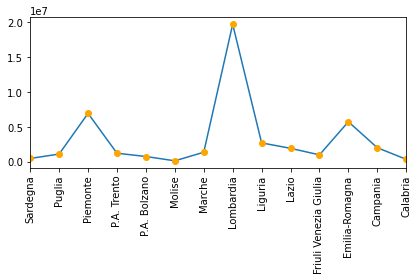

In [16]:
plt.plot(xvalue,yvals,marker='o',markerfacecolor='orange',markeredgecolor='orange')
plt.xlim(['Sardegna','Calabria'])
plt.xticks(rotation=90);
plt.tight_layout()